# Classification

Here we use the representations created in notebook.2 in the classification

In [1]:
import sys
sys.path.append('../')
from classifier.classical_classifiers import RFClassifier,SVM
from utility.file_utility import FileUtility

## Example of body-sites classifications

In [2]:
X=FileUtility.load_sparse_csr('../data_config/crohns-disease/k-mer_representations_labels/6-mers_rate_complete1359_seq_5000.npz')
Y=FileUtility.load_list('../data_config/crohns-disease/k-mer_representations_labels/labels_disease_complete1359.txt')


#### Random Forest classifier
MRF = RFClassifier(X, Y)
# results containing the best parameter, confusion metrix, best estimator, results on fold will be stored in this address
MRF.tune_and_eval('../data_config/crohns-disease/classification_results')


#### Support Vector Machine classifier
MSVM = SVM(X, Y)
# results containing the best parameter, confusion metrix, best estimator, results on fold will be stored in this address
MSVM.tune_and_eval('../data_config/crohns-disease/classification_results')



/home/lara/.local/share/virtualenvs/MicroPheno-master-D_fohRd5/lib/python3.5/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lara/.local/share/virtualenvs/MicroPheno-master-D_fohRd5/lib/python3.5/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Confusion matrix

In [3]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 
from utility.visualization_utility import create_mat_plot

Populating the interactive namespace from numpy and matplotlib


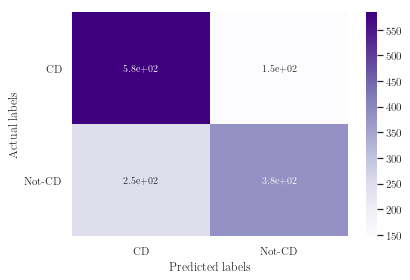

<Figure size 432x288 with 0 Axes>

In [4]:
## load the results
[label_set, conf, best_score_, best_estimator_,cv_results_, best_params_, predictions]=FileUtility.load_obj('../data_config/crohns-disease/classification_results/classification_results_RF.pickle')
label_set=[x.replace('_',' ') for x in label_set]
create_mat_plot(conf, label_set, '', '../output_dir/RF_result', 'Predicted labels' ,'Actual labels', cmap='Purples', filetype='pdf',font_s=8)

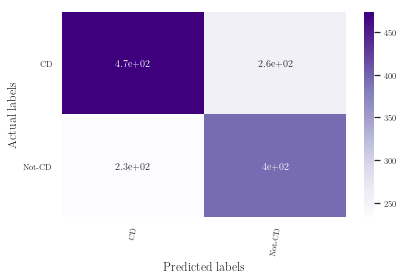

<Figure size 432x288 with 0 Axes>

In [5]:
[label_set, conf, best_score_, best_estimator_,cv_results_, best_params_, predictions]=FileUtility.load_obj('../data_config/crohns-disease/classification_results/classification_results_SVM.pickle')
label_set=[x.replace('_',' ') for x in label_set]
create_mat_plot(conf, label_set, '', '../output_dir/SVM_result', 'Predicted labels' ,'Actual labels', cmap='Purples', filetype='pdf', rx=80, ry=0, font_s=15)


In [6]:
best_params_

{'C': 100}

In [7]:
import numpy as np
import pandas as pd
from scipy import sparse

loader = np.load('../../Crohns_disease_prediction/datasets/dataset_6-mers_rate_complete1359_seq_5000.npz')
mtx = sparse.csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])
print(mtx)
# Se puede ver que es una matriz de 1359 x 4096
# Hay 1359 filas, que se corresponden con las 1359 muestras
# Hay 4096 columnas, que se corresponden con el número de 6-mers posibles que puede haber en cada secuencia
# (estos son todas las posibles combinaciones de A, C, G, T en cadenas de tamaño 6)

  (0, 1)	8.413764919408152e-06
  (0, 2)	2.4039328341166147e-06
  (0, 3)	6.009832085291537e-06
  (0, 5)	0.00036659975720278377
  (0, 6)	3.605899251174922e-06
  (0, 7)	0.00047838263398920636
  (0, 8)	7.211798502349844e-06
  (0, 9)	3.8462925345865835e-05
  (0, 10)	7.692585069173167e-05
  (0, 11)	1.0817697753524767e-05
  (0, 12)	2.4039328341166147e-06
  (0, 13)	3.605899251174922e-06
  (0, 14)	0.0001141868096205392
  (0, 15)	0.001173119223048908
  (0, 18)	3.605899251174922e-06
  (0, 19)	1.2019664170583073e-06
  (0, 20)	0.00013702417154464705
  (0, 21)	0.0002476050819140113
  (0, 22)	0.00012380254095700565
  (0, 23)	4.807865668233229e-06
  (0, 25)	1.3221630587641382e-05
  (0, 26)	8.413764919408152e-06
  (0, 27)	6.009832085291537e-06
  (0, 28)	0.00028726997367693546
  (0, 29)	9.615731336466459e-06
  :	:
  (1358, 4070)	0.0020147241858207627
  (1358, 4071)	4.445127899544915e-05
  (1358, 4072)	0.00032557558399369513
  (1358, 4073)	3.243741980748992e-05
  (1358, 4074)	7.208315512775538e-06
  (135

## Oral bacteria

In [ ]:
# Code for classification of oral bacteria data